In [10]:
import zipfile
import pytesseract
import cv2 as cv
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from zipfile import ZipFile 
from termcolor import colored

In [11]:
# file = r'/Users/massimiliano/Documents/Coursera - Python/small_img.zip'

In [12]:
file = r'/Users/massimiliano/Documents/Coursera - Python/images.zip'

In [13]:
face_cascade = cv.CascadeClassifier('/Users/massimiliano/Downloads/haarcascade_frontalface_default.xml')

In [14]:
with ZipFile(file, mode = 'r') as opener:
    name_lst = opener.namelist()
    file_info = opener.infolist()
    for i in range(len(name_lst)):
        print(colored(f"-- File {i} info", color='yellow', attrs=['bold']))
        print("Name: " + colored(f"{name_lst[i]}", color='green', attrs=['underline']))
        print(file_info[i])
        print(colored("Image retrieved correctly!\n", color='green', attrs=['underline']))

-- File 0 info
Name: a-0.png
<ZipInfo filename='a-0.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=21000053 compress_size=20825784>
Image retrieved correctly!

-- File 1 info
Name: a-1.png
<ZipInfo filename='a-1.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=22598429 compress_size=20777241>
Image retrieved correctly!

-- File 2 info
Name: a-10.png
<ZipInfo filename='a-10.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=18166003 compress_size=17958880>
Image retrieved correctly!

-- File 3 info
Name: a-11.png
<ZipInfo filename='a-11.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=7458745 compress_size=6390977>
Image retrieved correctly!

-- File 4 info
Name: a-12.png
<ZipInfo filename='a-12.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=2421677 compress_size=2170555>
Image retrieved correctly!

-- File 5 info
Name: a-13.png
<Zi

Thresholds: 135,148

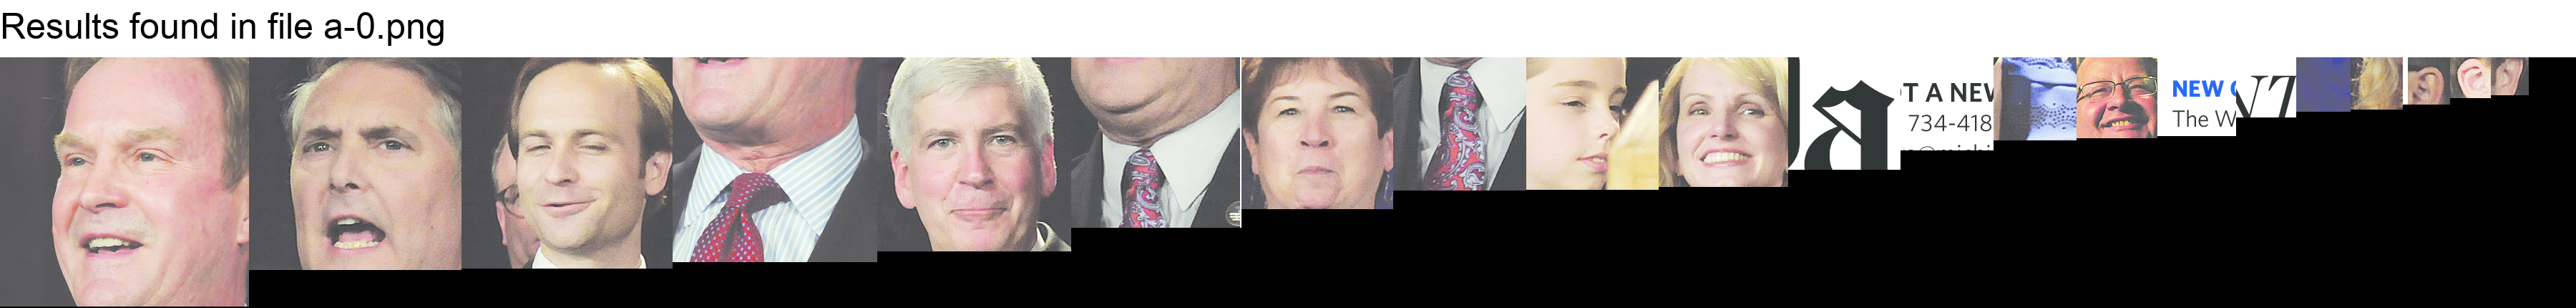

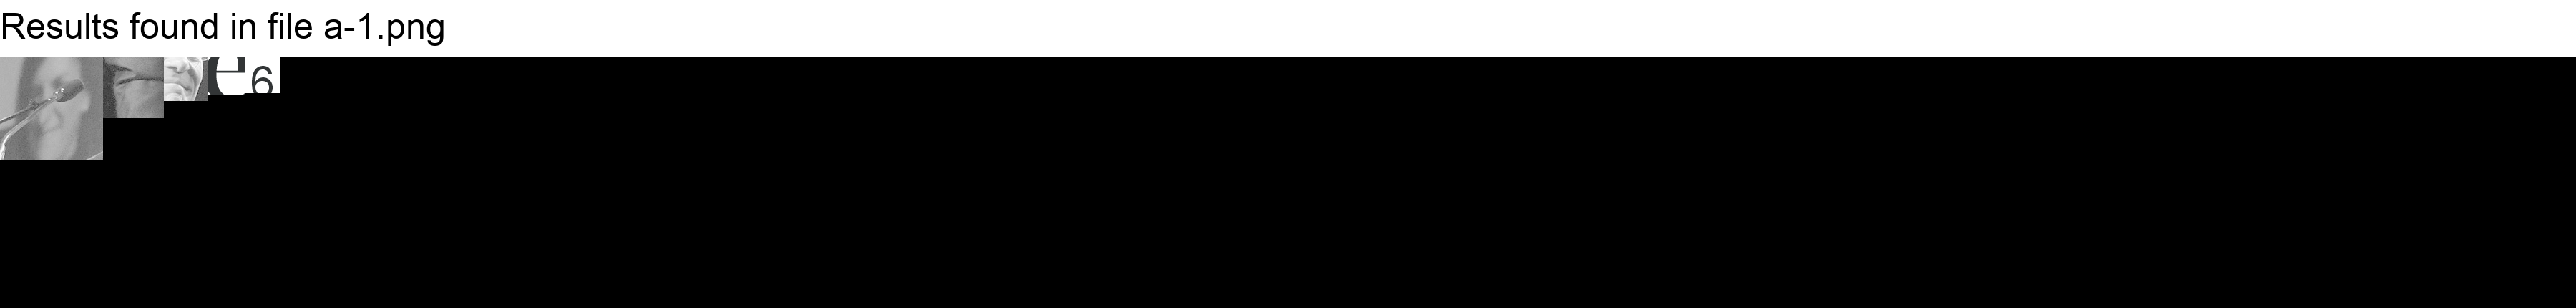

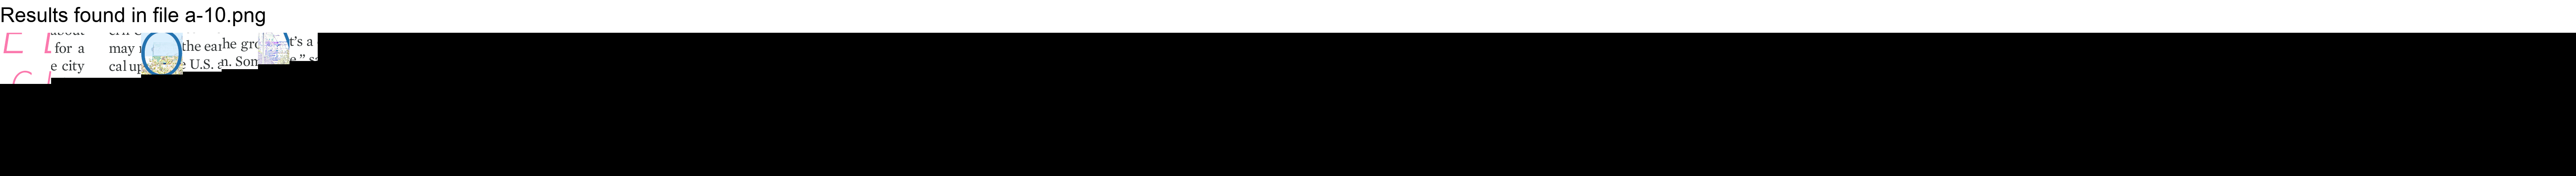

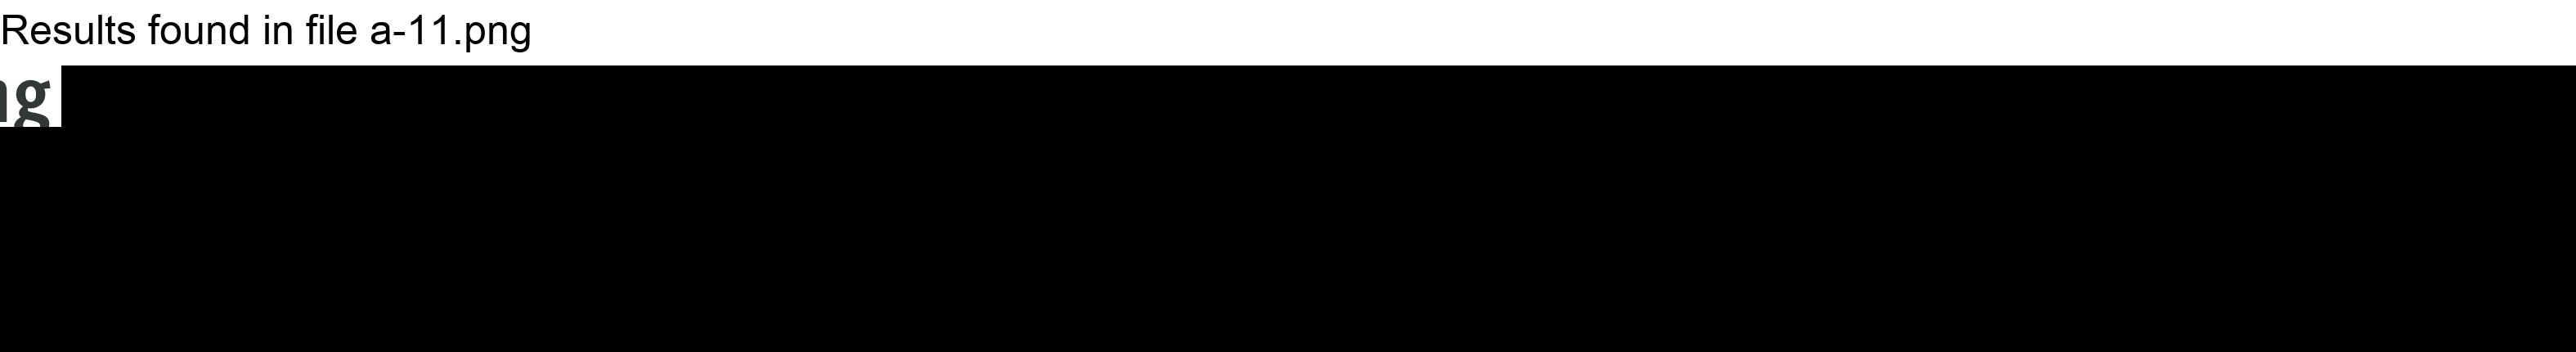

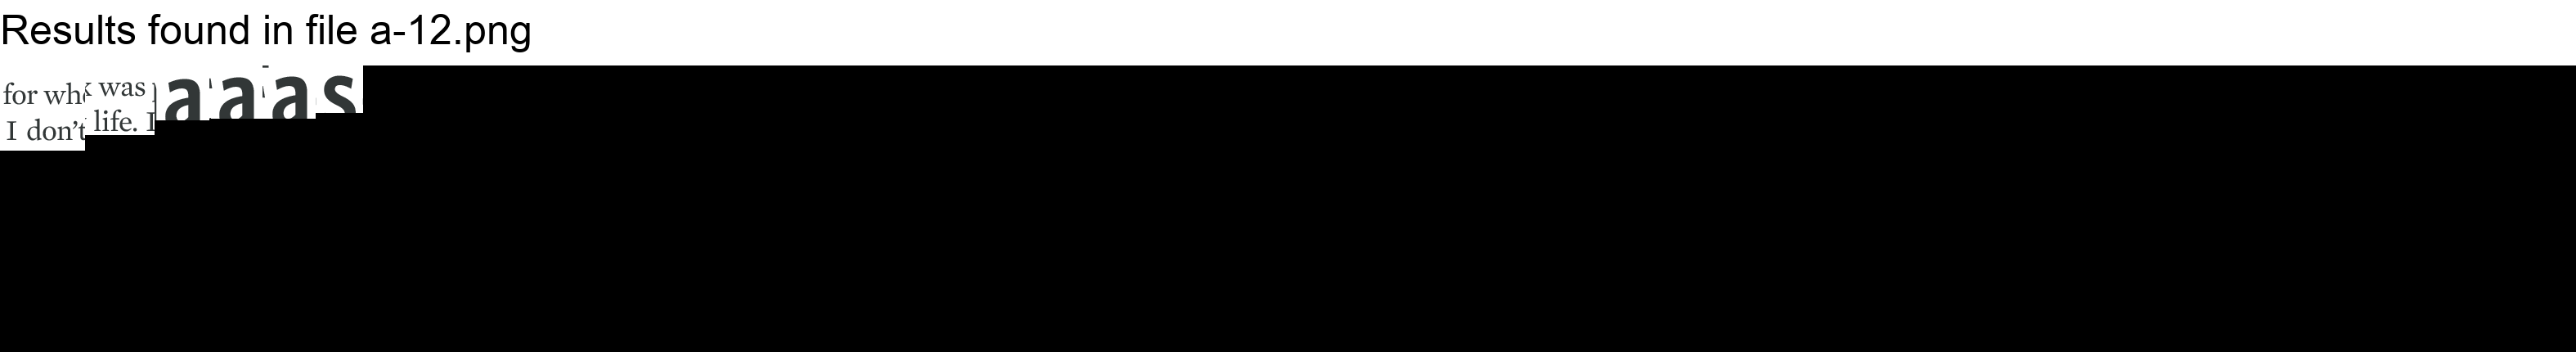

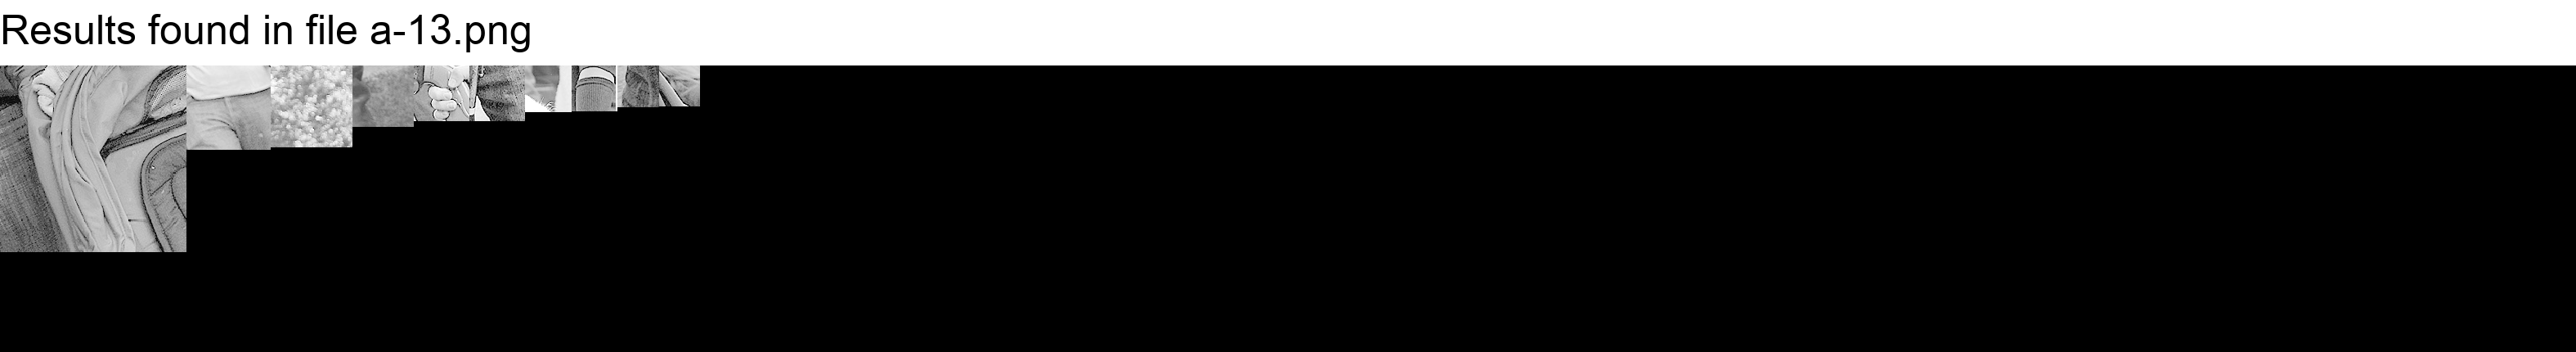

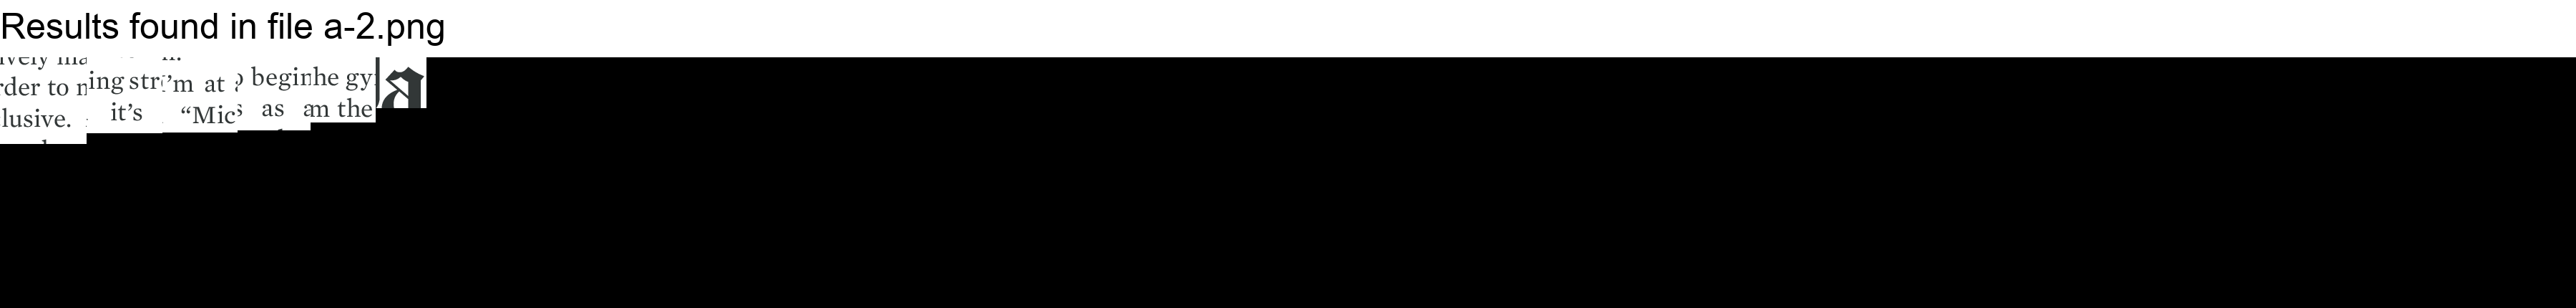

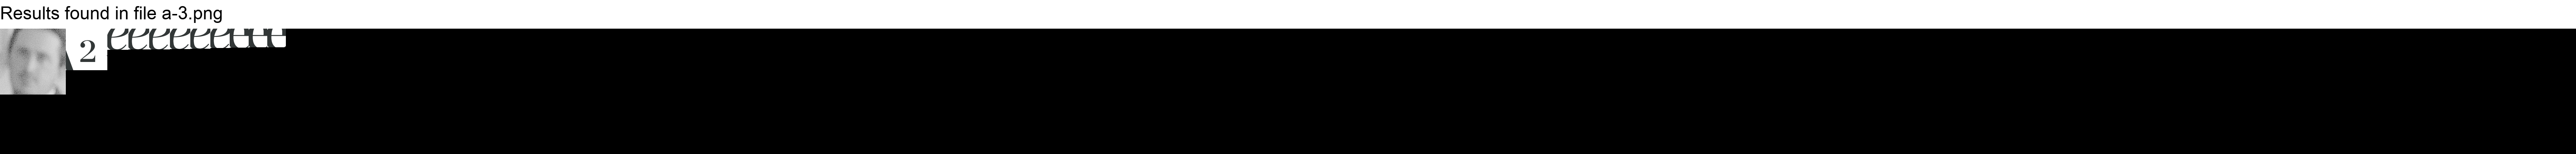

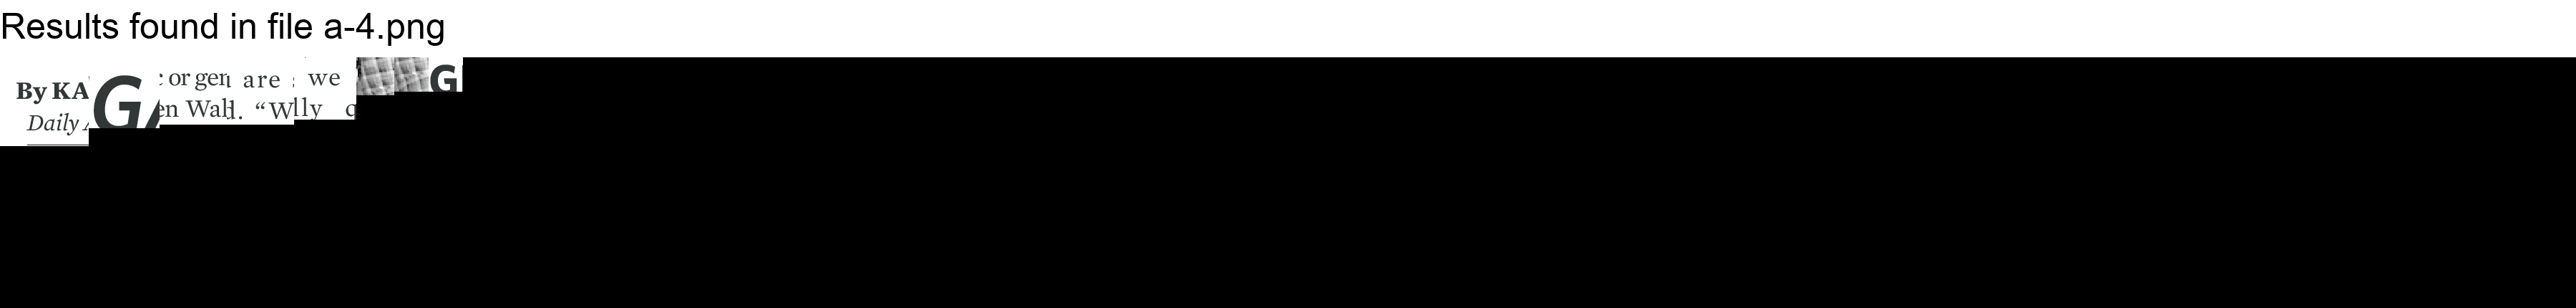

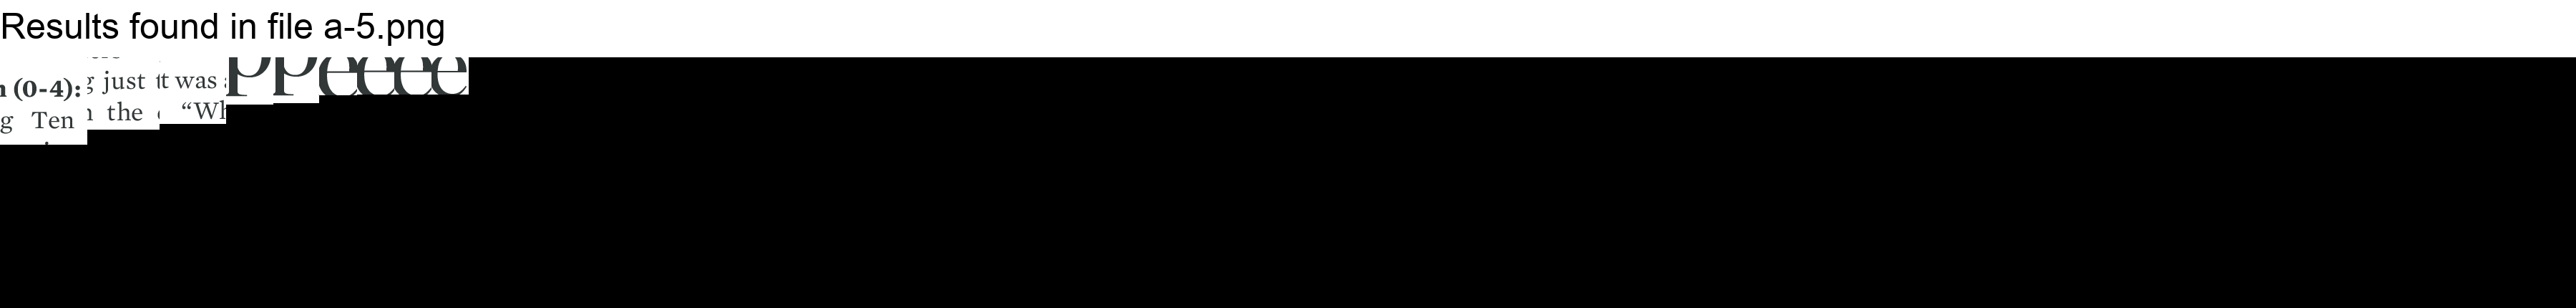

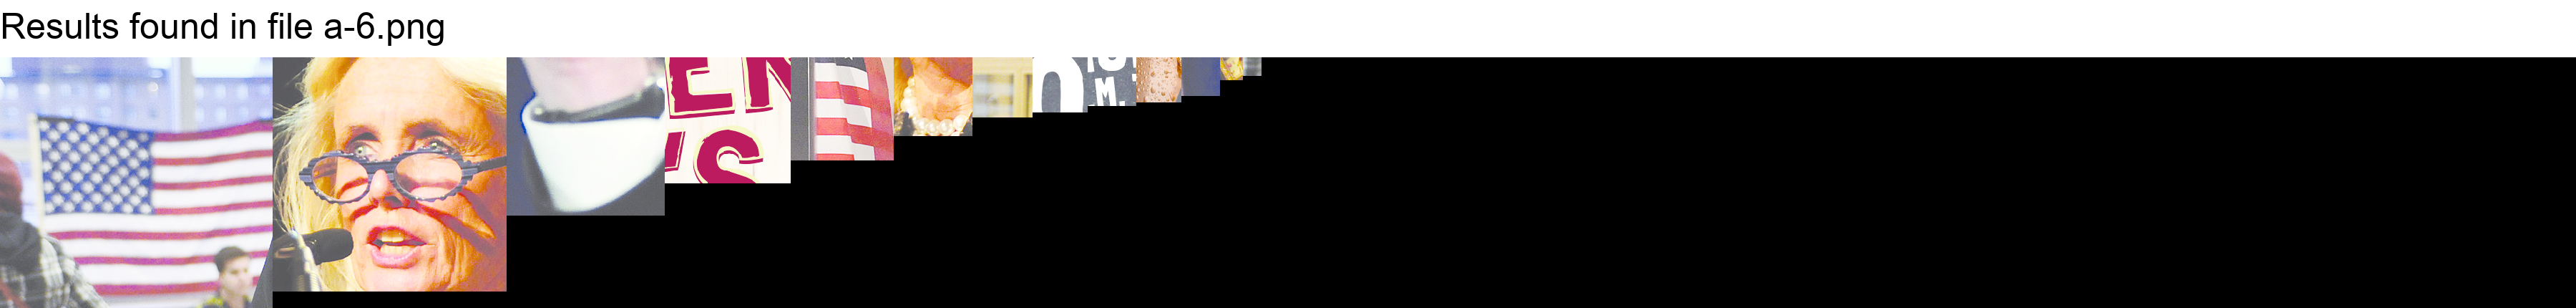

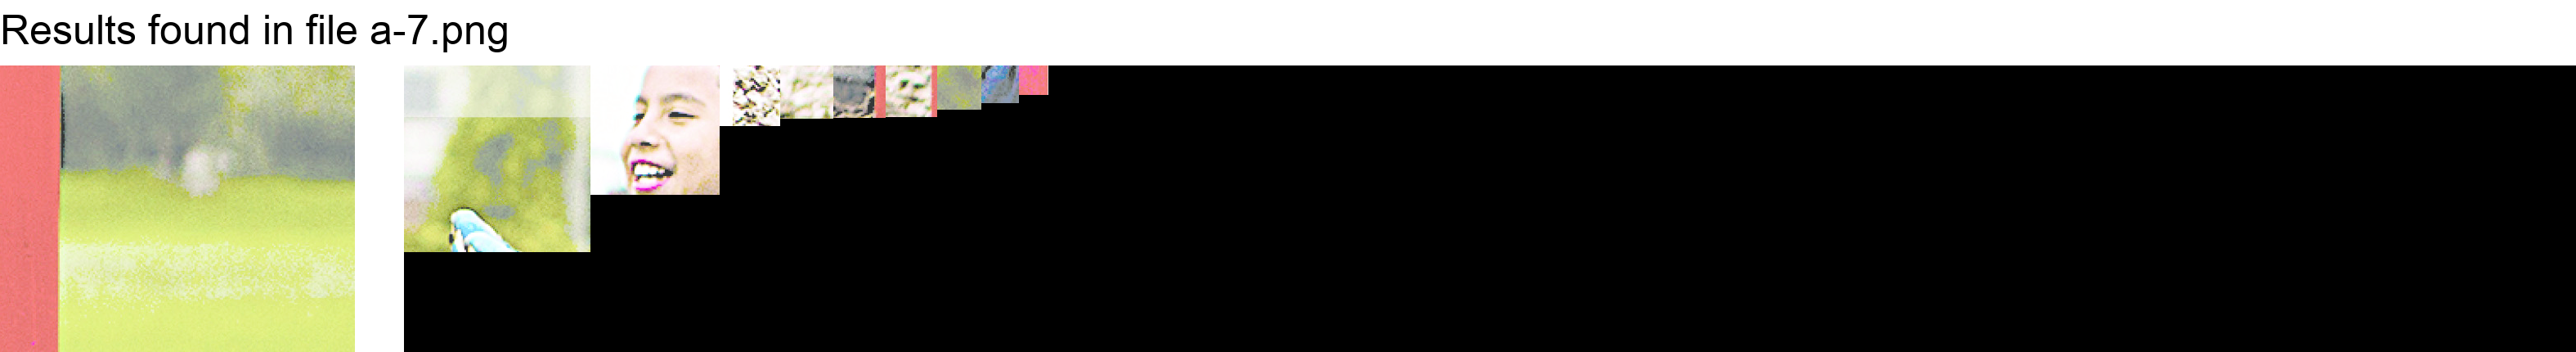

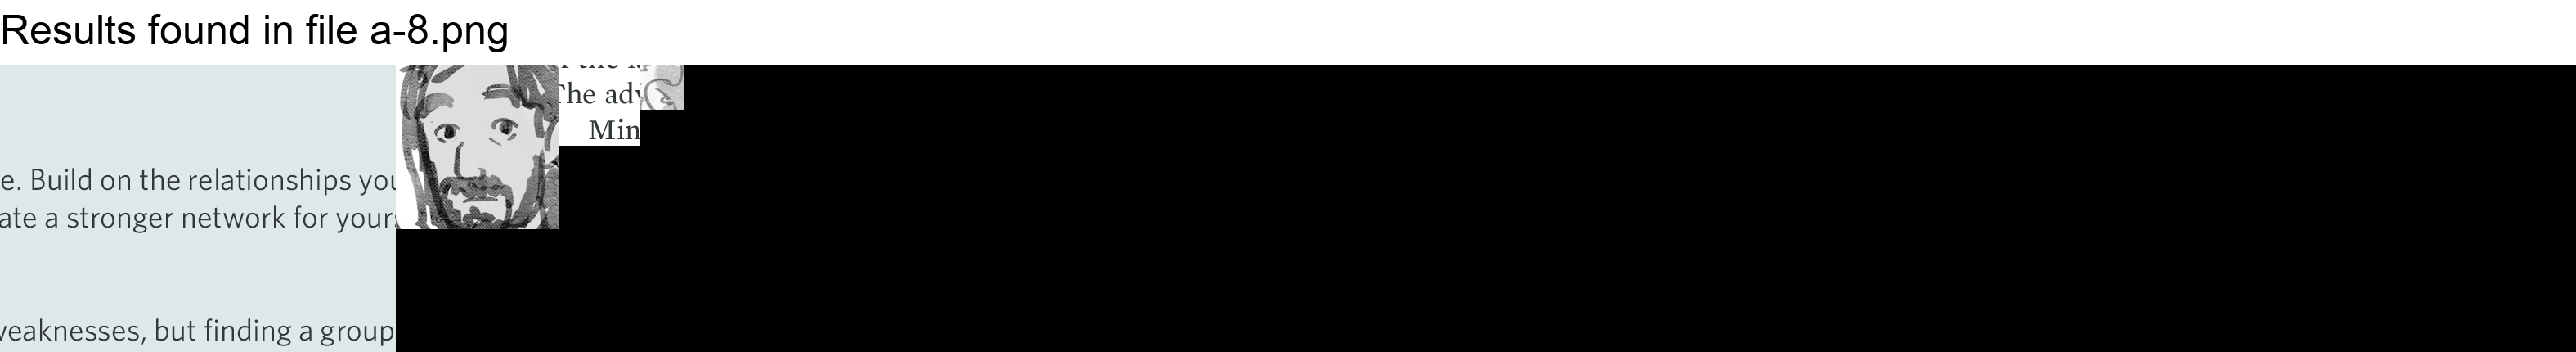

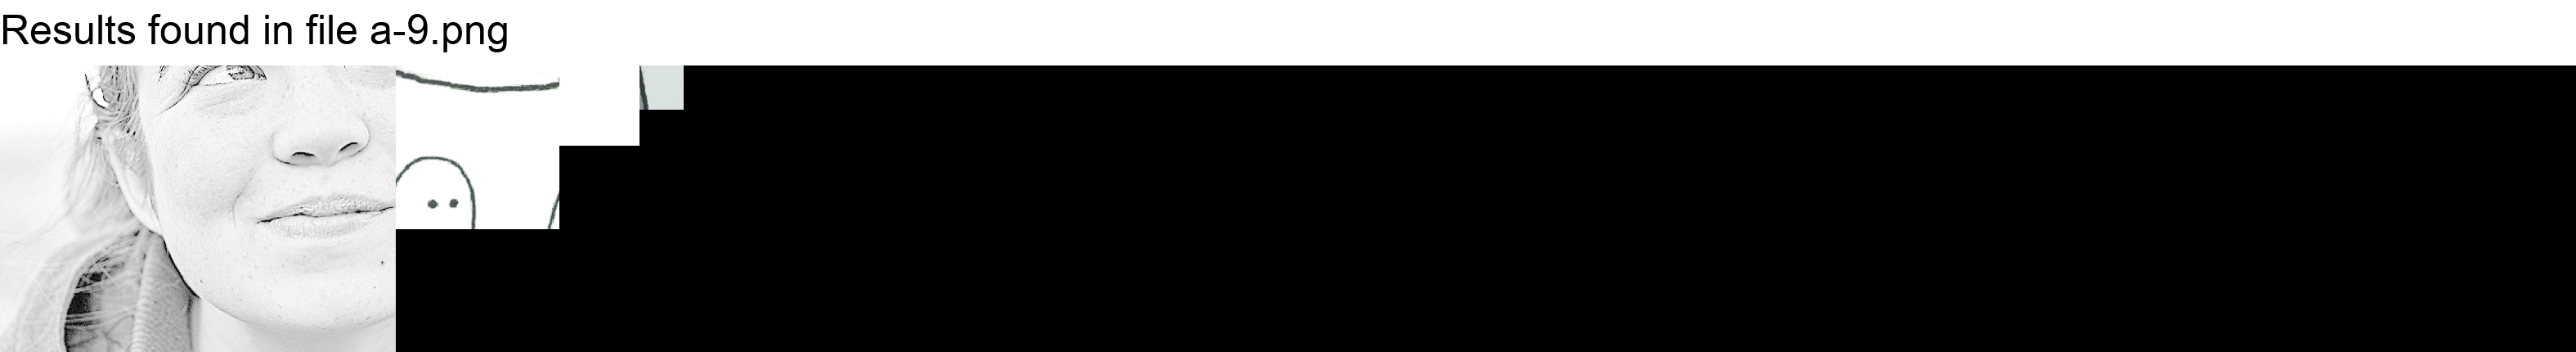

In [18]:
with ZipFile(file, mode = 'r') as reader:
    name_lst = reader.namelist()
    file_info = reader.infolist()
    for i in range(len(name_lst)):

        ifile = reader.open(name_lst[i])


        img = Image.open(ifile)
        banner = Image.new('RGB', (img.width, 80), color='white')
        background = Image.new('RGB', (img.width, 350 + banner.height))
        new_img = background.copy()
        new_img.paste(banner, (0,0))
        font = ImageFont.truetype('/Library/Fonts/Arial Unicode.ttf', 50)


        open_cv_img = np.array(img)
#'140,160'
        cv_img_binarization = cv.threshold(open_cv_img, 135, 148, cv.THRESH_BINARY)[1]

        faces  = face_cascade.detectMultiScale(cv_img_binarization)

        # openCV IMAGE COORDINATES ARE (X,Y,W,H)
        try:
            faces_lst = faces.tolist()
            faces_lst.sort(key = lambda x: x[3], reverse=True)
        except:
            pass

        if faces_lst:

            W_img_to_paste = 0
            Y_img_to_paste = 0+banner.height

            for face_coord in faces_lst:
                # PIL IMAGE COORDINATES ARE (x1,y1,x2,y2)
                # In order to find x2 you have to sum the starting point "x1" and the total widht of the rectangle "W"
                x,y,w,h = face_coord
                face_region = Image.fromarray(open_cv_img[y:y+h, x:x+w])
                new_img.paste(face_region,(0+W_img_to_paste, Y_img_to_paste))
                W_img_to_paste += face_region.width   
                text = f"Results found in file {name_lst[i]}" 
        else:

            text = f"Results found in file {name_lst[i]}\nBut there were no faces in that file!" 

        draw = ImageDraw.Draw(new_img)
        draw.text((0, 0), text, font=font, fill=(0,0,0,255))
        display(new_img)
            

In [ ]:
# with ZipFile(file, mode = 'r') as reader:
#     name_lst = reader.namelist()
#     file_info = reader.infolist()
#     for i in range(1):
#         ifile = reader.open(name_lst[i])

#         img = Image.open(ifile)
#         open_cv_img = np.array(img)

#         cv_img_binarization = cv.threshold(open_cv_img, 135, 148, cv.THRESH_BINARY)[1]

#         faces  = face_cascade.detectMultiScale(cv_img_binarization)

#         # openCV IMAGE COORDINATES ARE (X,Y,W,H)
#         faces_lst = faces.tolist() 

#         pil_img = Image.fromarray(open_cv_img, "RGB")
#         drawing = ImageDraw.Draw(pil_img)

#         for face_coord in faces_lst:
#             # PIL IMAGE COORDINATES ARE (x1,y1,x2,y2)
#             # In order to find x2 you have to sum the starting point "x1" and the total widht of the rectangle "W"
#             drawing.rectangle((face_coord[0], face_coord[1], face_coord[2]+ face_coord[0], face_coord[3]+ face_coord[1]), outline='GREEN') 
#             ##


#         display(pil_img)
